In [14]:
import tensorflow as tf
import numpy as np

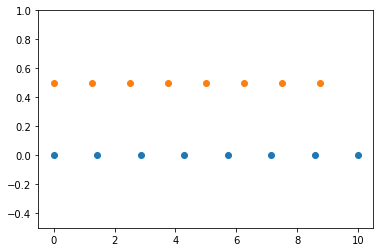

In [15]:
import matplotlib.pyplot as plt
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')

plt.plot(x2, y + 0.5, 'o')

plt.ylim([-0.5, 1])

plt.show()

### create a linear function 
> y = 2x+b  
> 2 is the weight and b is the bias  

so the final result should be something around 2

### plot the train data

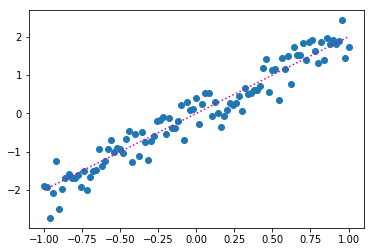

In [33]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 # create a y value which is approximately linear but with some random noise
plt.plot(trX, trY, 'o')
plt.plot(trX, 2 * trX, 'm:');  
plt.show()

In [17]:
X = tf.placeholder("float") # create symbolic variables
Y = tf.placeholder("float")

def model(X, w):
    return tf.multiply(X, w) # lr is just X*w so this model line is pretty simple

w = tf.Variable(0.0, name="weights") # create a shared variable (like theano.shared) for the weight matrix
y_model = model(X, w)

cost = tf.square(Y - y_model) # use square error for cost function

train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost) # construct an optimizer to minimize cost and fit line to my data

In [18]:
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize variables (in this case just variable W)
    tf.global_variables_initializer().run()

    for i in range(100):
        for (x, y) in zip(trX, trY):
            sess.run(train_op, feed_dict={X: x, Y: y})

    print(sess.run(w))  # It should be something around 2

1.96551
